In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataSets/sales_data.csv')

In [3]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [5]:
df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [6]:
df.isna().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [7]:
df[df.duplicated()]

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep


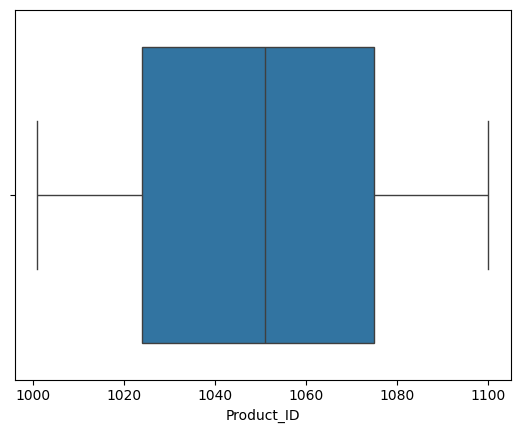

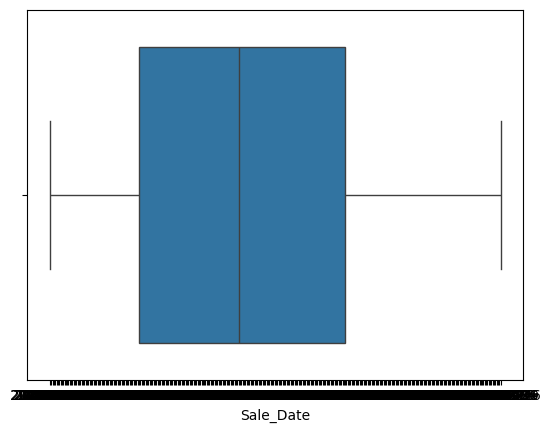

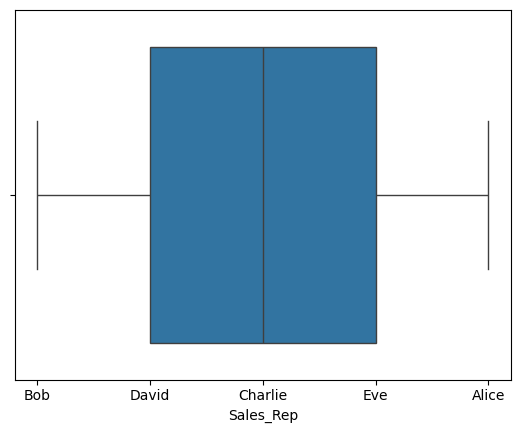

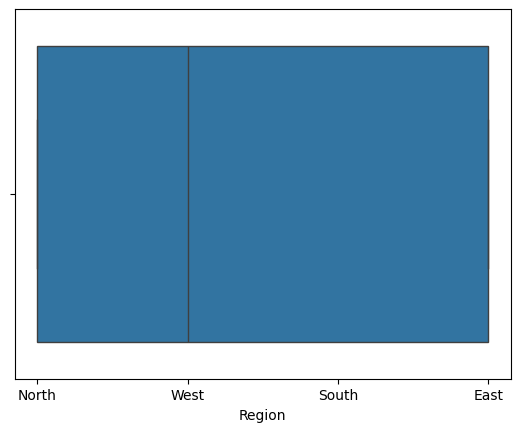

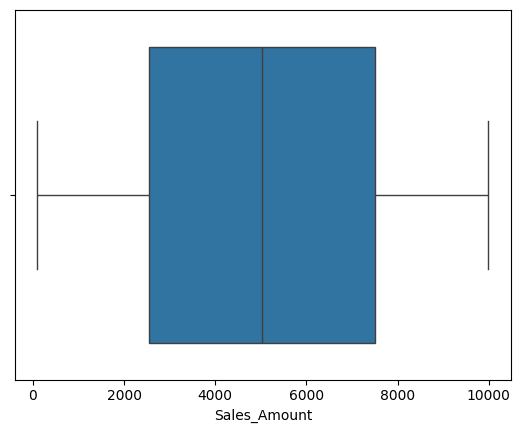

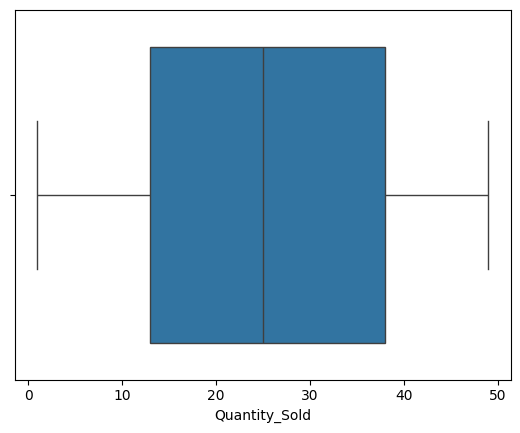

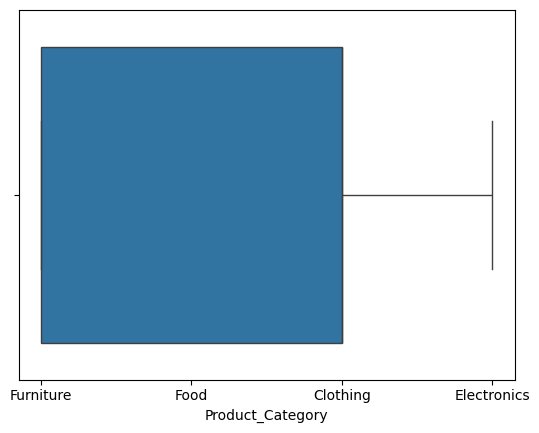

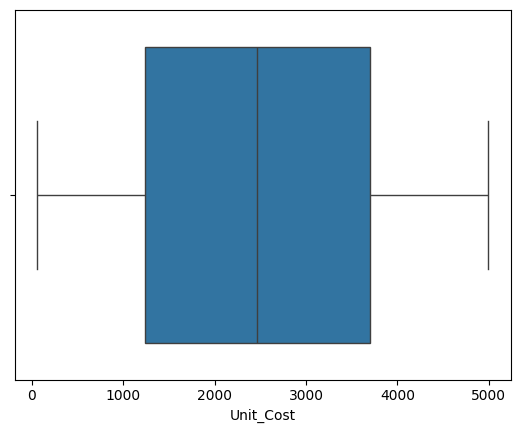

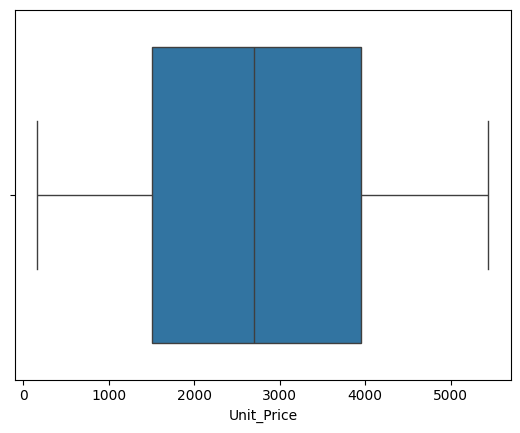

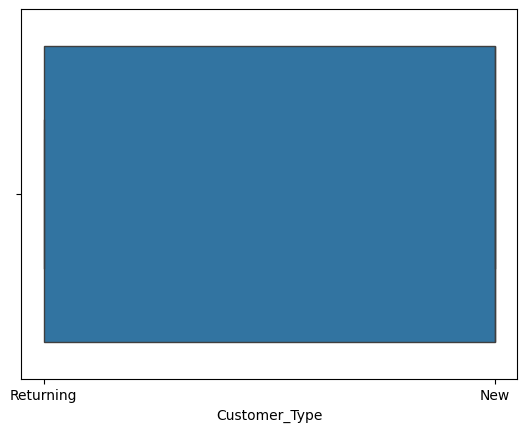

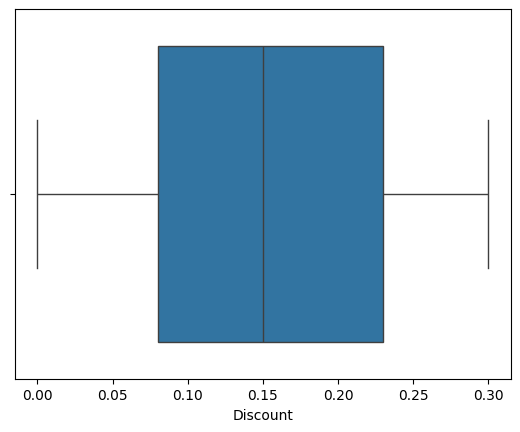

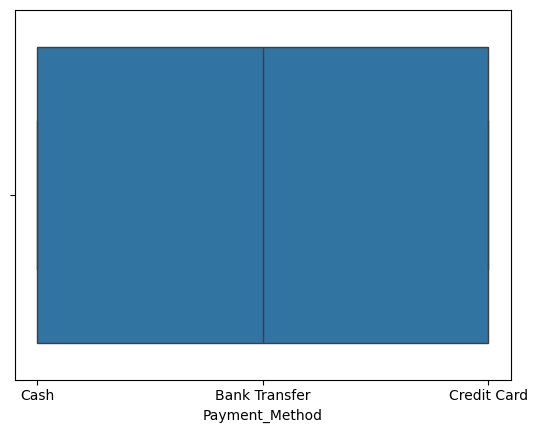

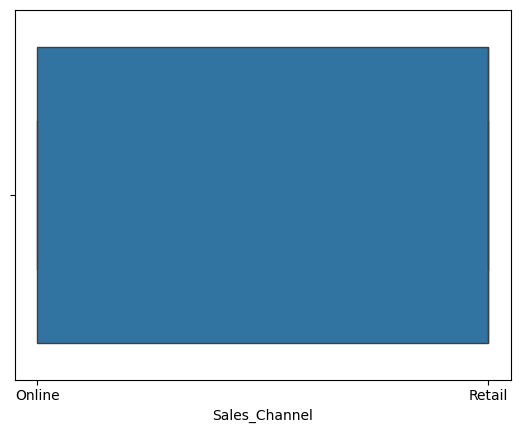

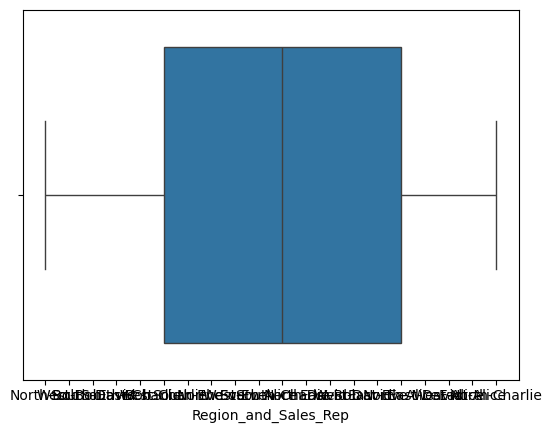

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [10]:
df.nunique()

Product_ID               100
Sale_Date                340
Sales_Rep                  5
Region                     4
Sales_Amount             998
Quantity_Sold             49
Product_Category           4
Unit_Cost                998
Unit_Price              1000
Customer_Type              2
Discount                  31
Payment_Method             3
Sales_Channel              2
Region_and_Sales_Rep      20
dtype: int64

In [11]:
# We will now be doing some transformations
df.drop(columns=['Product_ID'], inplace=True) # Not needed
df.drop(columns=['Region_and_Sales_Rep'], inplace=True) # Not needed

# Raw date is not what we want
df['Sale_Year'] = pd.to_datetime(df['Sale_Date']).dt.year
df['Sale_Month'] = pd.to_datetime(df['Sale_Date']).dt.month
df['Sale_Day'] = pd.to_datetime(df['Sale_Date']).dt.day
df.drop(columns=['Sale_Date'], inplace=True)

# Identify categorical columns with <= 35 unique values (good heuristic)
categorical_cols = df.select_dtypes(include=['object', 'category']).nunique()
categorical_cols = categorical_cols[categorical_cols <= 35].index.tolist()

# Now perform One-Hot Encoding on these categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first=True avoids dummy trap

In [12]:
df.head()

,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Sale_Year,Sale_Month,Sale_Day,Sales_Rep_Bob,Sales_Rep_Charlie,...,Region_North,Region_South,Region_West,Product_Category_Electronics,Product_Category_Food,Product_Category_Furniture,Customer_Type_Returning,Payment_Method_Cash,Payment_Method_Credit Card,Sales_Channel_Retail
0,5053.97,18,152.75,267.22,0.09,2023,2,3,True,False,...,True,False,False,False,False,True,True,True,False,False
1,4384.02,17,3816.39,4209.44,0.11,2023,4,21,True,False,...,False,False,True,False,False,True,True,True,False,True
2,4631.23,30,261.56,371.40,0.20,2023,9,21,False,False,...,False,True,False,False,True,False,True,False,False,True
3,2167.94,39,4330.03,4467.75,0.02,2023,8,24,True,False,...,False,True,False,False,False,False,False,False,True,True
4,3750.20,13,637.37,692.71,0.08,2023,3,24,False,True,...,False,False,False,True,False,False,False,False,True,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sales_Amount                  1000 non-null   float64
 1   Quantity_Sold                 1000 non-null   int64  
 2   Unit_Cost                     1000 non-null   float64
 3   Unit_Price                    1000 non-null   float64
 4   Discount                      1000 non-null   float64
 5   Sale_Year                     1000 non-null   int32  
 6   Sale_Month                    1000 non-null   int32  
 7   Sale_Day                      1000 non-null   int32  
 8   Sales_Rep_Bob                 1000 non-null   bool   
 9   Sales_Rep_Charlie             1000 non-null   bool   
 10  Sales_Rep_David               1000 non-null   bool   
 11  Sales_Rep_Eve                 1000 non-null   bool   
 12  Region_North                  1000 non-null   bool   
 13  Regi

In [18]:
from sklearn.model_selection import train_test_split

target = 'Sales_Amount'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Baseline model

from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor # or RandomForestClassifier if classification

baselineModel = RandomForestRegressor(random_state=42)
baselineModel.fit(X_train, y_train)

y_pred = baselineModel.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)  # RMSE
r2 = r2_score(y_test, y_pred)


# R2 Score: Shows how well the model explains the data.
#        1 means perfect match, 0 means model just guesses the average,
#        negative means model is worse than guessing average.

# RMSE (Root Mean Squared Error): Shows how far off predictions are on average.
#        Lower is better. It’s like the average "error distance" between predictions and real values.

print(f"RMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")


RMSE: 3143.667
R2 Score: -0.069


In [23]:
df.head()

,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Sale_Year,Sale_Month,Sale_Day,Sales_Rep_Bob,Sales_Rep_Charlie,...,Region_North,Region_South,Region_West,Product_Category_Electronics,Product_Category_Food,Product_Category_Furniture,Customer_Type_Returning,Payment_Method_Cash,Payment_Method_Credit Card,Sales_Channel_Retail
0,5053.97,18,152.75,267.22,0.09,2023,2,3,True,False,...,True,False,False,False,False,True,True,True,False,False
1,4384.02,17,3816.39,4209.44,0.11,2023,4,21,True,False,...,False,False,True,False,False,True,True,True,False,True
2,4631.23,30,261.56,371.40,0.20,2023,9,21,False,False,...,False,True,False,False,True,False,True,False,False,True
3,2167.94,39,4330.03,4467.75,0.02,2023,8,24,True,False,...,False,True,False,False,False,False,False,False,True,True
4,3750.20,13,637.37,692.71,0.08,2023,3,24,False,True,...,False,False,False,True,False,False,False,False,True,False


In [27]:
# Now we will try param_grid

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None], 
}

modelV2 = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
modelV2.fit(X_train, y_train)

featuredModel = modelV2.best_estimator_
y_pred = featuredModel.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)  # RMSE
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
RMSE: 3101.671
R2 Score: -0.041
